I acquired my fertilizer recommendation dataset from Kaggle, a renowned platform for data science resources. This dataset is rich in critical information, including temperature, humidity, moisture, soil type, crop type, nitrogen, potassium, phosphorous, and the corresponding recommended fertilizer. The diverse and comprehensive nature of the dataset, made available through Kaggle, has empowered me to delve into the intricate relationships between environmental factors and the optimal selection of fertilizers for various crops. This exploration is instrumental in enhancing my understanding of the factors influencing fertilizer recommendations in diverse agricultural conditions.


The dataset contains information related to fertilizer recommendations and is structured with the following columns:

1. Temperature: Indicates the temperature conditions, likely influencing the choice of fertilizer.
2. Humidity: Represents the level of humidity, which can impact the effectiveness of different fertilizers.
3. Moisture: Describes the moisture content, another important factor for fertilizer selection.
4. Soil Type: Specifies the type of soil, which influences the choice of fertilizer.
5. Crop Type: Indicates the type of crop for which the fertilizer recommendation is made.
6. Nitrogen: Provides information about the nitrogen content in the soil.
7. Potassium: Represents the potassium content in the soil.
8. Phosphorous: Describes the phosphorous content in the soil.
9. Fertilizer Name: This is the output or target variable, indicating the recommended fertilizer based on the specified conditions.


By exploring and analyzing this dataset, you can gain insights into the relationships between environmental factors and the recommended fertilizers for specific crops. This information is valuable for making informed decisions about fertilizer application in agriculture.

In [44]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
#from imblearn.over_sampling import SMOTE

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_csv("Fertilizer Prediction.csv")
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [47]:
# Obtain the unique values in the 'Fertilizer Name' column of the DataFrame
unique_fertilizers = data["Fertilizer Name"].unique()

In [5]:
# Obtain the unique values in the "Soil Type" column of the DataFrame
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [6]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [7]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

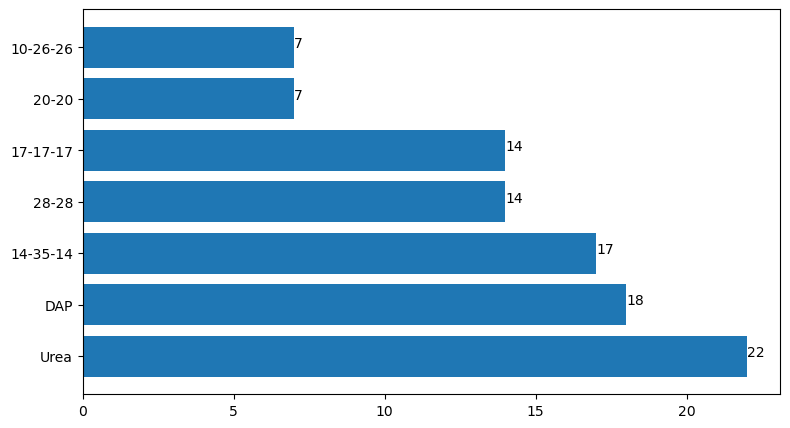

In [8]:
# Extract unique fertilizer names from the 'Fertilizer Name' column
labels = data["Fertilizer Name"].unique()

# Count the occurrences of each unique fertilizer name
counts = list(data["Fertilizer Name"].value_counts())

# Create a horizontal bar plot
plt.figure(figsize=(9, 5))
plt.barh(labels, counts)

# Add text annotations for each bar to display the count
for index, value in enumerate(counts):
    plt.text(value, index, str(value))

# Display the plot
plt.show()


In [9]:
# # Define the columns for continuous and categorical data
# continuous_data_cols = ["Temperature", "Humidity", "Moisture", "Nitrogen", "Phosphorous"]
# categorical_data_cols = ["Soil Type", "Crop Type"]

# # Create a heatmap to visualize the correlation among continuous variables
# # Using Seaborn (sns) library
# sns.heatmap(data[continuous_data_cols].corr(), center=0, annot=True);


In [10]:
# Import the LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
soil_type_label_encoder = LabelEncoder()

# Use the fit_transform method to encode the 'Soil Type' column
# The transformed values replace the original values in the DataFrame
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])


In [11]:
# Import the LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder for 'Crop Type'
crop_type_label_encoder = LabelEncoder()

# Use the fit_transform method to encode the 'Crop Type' column
# The transformed values replace the original values in the DataFrame
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])


In [12]:
# Create a dictionary to map encoded crop types back to original labels
croptype_dict = {}

# Iterate over unique encoded values in 'Crop Type'
for i in range(len(data["Crop Type"].unique())):
    # Use inverse_transform to map the encoded value back to the original label
    original_label = crop_type_label_encoder.inverse_transform([i])[0]
    # Add the mapping to the dictionary
    croptype_dict[i] = original_label

# Print the dictionary
print(croptype_dict)

# Create a dictionary to map encoded soil types back to original labels
soiltype_dict = {}

# Iterate over unique encoded values in 'Soil Type'
for i in range(len(data["Soil Type"].unique())):
    # Use inverse_transform to map the encoded value back to the original label
    original_label = soil_type_label_encoder.inverse_transform([i])[0]
    # Add the mapping to the dictionary
    soiltype_dict[i] = original_label

# Print the dictionary
print(soiltype_dict)


{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [13]:
# Import the LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder for 'Fertilizer Name'
fertname_label_encoder = LabelEncoder()

# Use the fit_transform method to encode the 'Fertilizer Name' column
# The transformed values replace the original values in the DataFrame
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])


In [14]:
# Create a dictionary to map encoded fertilizer names back to original labels
fertname_dict = {}

# Iterate over unique encoded values in 'Fertilizer Name'
for i in range(len(data["Fertilizer Name"].unique())):
    # Use inverse_transform to map the encoded value back to the original label
    original_label = fertname_label_encoder.inverse_transform([i])[0]
    # Add the mapping to the dictionary
    fertname_dict[i] = original_label

# Print the dictionary
print(fertname_dict)


{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [15]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [16]:
# Extract features (X) by selecting all columns except the last one
X = data[data.columns[:-1]]

# Extract the target variable (y) by selecting the last column
y = data[data.columns[-1]]


In [17]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 4: 17, 1: 14, 3: 14, 2: 7, 0: 7})

In [18]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 99


In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 3)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (79, 8), (79,)
Train Data: (20, 8), (20,)


**K-NEAREST NEIGHBORS (KNN)**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

# Create an instance of KNeighborsClassifier
KNN = KNeighborsClassifier()

# Fit the model with the training data
KNN.fit(X_train, y_train)

# Make predictions on the test set
predicted = KNN.predict(X_test)

# Calculate and store the accuracy score
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)

# Store the model name for reference
model.append('K Nearest Neighbours')

# Print the accuracy score
print("KNN Accuracy is: ", x * 100)

# Display the classification report
print(classification_report(y_test, predicted))


KNN Accuracy is:  80.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.50      0.57         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         4

    accuracy                           0.80        20
   macro avg       0.74      0.64      0.68        20
weighted avg       0.88      0.80      0.83        20



The output you provided is from the classification report, which is a summary of the performance metrics for each class in a classification task. Here's a brief explanation:

- KNN Accuracy is: 80.0%: This is the overall accuracy of the K Nearest Neighbors (KNN) classifier on the test set. It indicates that the model correctly predicted the class labels for 80% of the instances in the test set.

- Precision: Precision is a measure of how many of the predicted positive instances are actually positive. For example:

- Precision for class 1 (1 in the classification report): 67% indicates that 67% of instances predicted as class 1 were correctly classified.
- Precision for class 2: 100% indicates that all instances predicted as class 2 were correctly classified.
- Recall: Recall is a measure of how many of the actual positive instances were correctly predicted. For example:

- Recall for class 1: 50% indicates that 50% of actual instances of class 1 were correctly predicted.
- Recall for class 2: 50% indicates that 50% of actual instances of class 2 were correctly predicted.
- F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

- Support: Support represents the number of actual occurrences of each class in the test set.

- Macro avg: This is the average of precision, recall, and F1-score across all classes, giving equal weight to each class.

- Weighted avg: This is the weighted average of precision, recall, and F1-score, with weights based on the number of true instances for each class.

**SUPPORT VECTOR MACHINE (SVM)**

In [23]:
from sklearn.svm import SVC

In [24]:
# Importing the SVC (Support Vector Classifier) class and metrics from scikit-learn
from sklearn.svm import SVC
from sklearn import metrics

# Create an instance of the SVC class with probability estimates enabled
SVC = SVC(probability=True)

# Train the SVC model using the training dataset
# X_train contains the features, y_train contains the corresponding labels
SVC.fit(X_train, y_train)

# Predict the labels for the test dataset
predicted = SVC.predict(X_test)

# Calculate the accuracy of the model on the test dataset
# y_test contains the true labels, and 'predicted' contains the predicted labels
x = metrics.accuracy_score(y_test, predicted)

# Append the accuracy score to the 'acc' list (assuming 'acc' is predefined)
acc.append(x)

# Append the string 'SVC' to the 'model' list (assuming 'model' is predefined)
model.append('SVC')

# Print the accuracy of the model in percentage
print("SVC Accuracy is: ", x * 100)

# Print the classification report showing main classification metrics
# This includes precision, recall, f1-score for each class
print(classification_report(y_test, predicted))


SVC Accuracy is:  70.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.60      1.00      0.75         3
           4       1.00      1.00      1.00         5
           5       0.33      1.00      0.50         2
           6       1.00      1.00      1.00         4

    accuracy                           0.70        20
   macro avg       0.49      0.67      0.54        20
weighted avg       0.57      0.70      0.61        20



- SVC Accuracy is: 70.0%: This is the overall accuracy of the Support Vector Classifier on the test set, indicating that the model correctly predicted the class labels for 70% of the instances.

- Precision: Precision measures how many of the predicted positive instances are actually positive.

- Precision for class 1: 0% indicates that none of the instances predicted as class 1 were correctly classified.
- Precision for class 2: 0% indicates that none of the instances predicted as class 2 were correctly classified.
- Precision for class 3: 60% indicates that 60% of instances predicted as class 3 were correctly classified.
- Precision for class 4: 100% indicates that all instances predicted as class 4 were correctly classified.
- Precision for class 5: 33% indicates that 33% of instances predicted as class 5 were correctly classified.
- Precision for class 6: 100% indicates that all instances predicted as class 6 were correctly classified.
- Recall: Recall measures how many of the actual positive instances were correctly predicted.

- Recall for class 1: 0% indicates that none of the actual instances of class 1 were correctly predicted.
- Recall for class 2: 0% indicates that none of the actual instances of class 2 were correctly predicted.
- Recall for class 3: 100% indicates that all actual instances of class 3 were correctly predicted.
- Recall for class 4: 100% indicates that all actual instances of class 4 were correctly predicted.
- Recall for class 5: 100% indicates that all actual instances of class 5 were correctly predicted.
- Recall for class 6: 100% indicates that all actual instances of class 6 were correctly predicted.
- F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

- Support: Support represents the number of actual occurrences of each class in the test set.

- Macro avg: This is the average of precision, recall, and F1-score across all classes, giving equal weight to each class.

- Weighted avg: This is the weighted average of precision, recall, and F1-score, with weights based on the number of true instances for each class.

**ACCURACY COMPARISION**

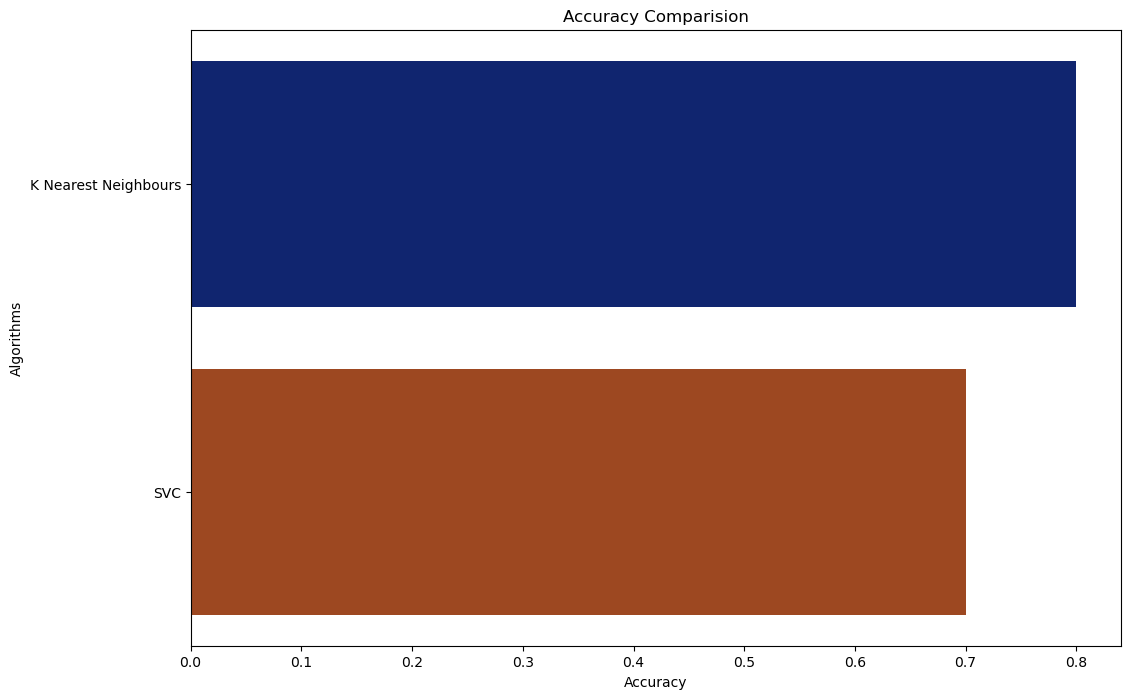

In [25]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark');

In [26]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

K Nearest Neighbours --> 80.0 %
SVC --> 70.0 %


1. K Nearest Neighbours --> 80.0 %: This indicates that the K Nearest Neighbours model correctly predicted the class or label of the data points 80% of the time. KNN is a type of instance-based learning or non-generalizing learning. It does not attempt to construct a general internal model but stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point.

2. SVC --> 70.0 %: This shows that the Support Vector Classifier model had an accuracy of 70%. This means that in 70% of the cases, the SVC model correctly identified the class or label of the data points. SVC is a powerful, versatile machine learning algorithm, especially for classification tasks. It works well in high dimensional spaces and is effective in cases where the number of dimensions is greater than the number of samples.


 A higher percentage indicates better performance. In your case, the K Nearest Neighbours model outperformed the Support Vector Classifier with an accuracy of 80% compared to 70%.

## Fine Tunning 

### Method1: GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Sample data split (replace X and y with your actual data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the models
knn_model = KNeighborsClassifier()
svm_model = SVC()

# Define the hyperparameter grids for each model
param_grid = {
    KNeighborsClassifier: {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    SVC: {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly']}
}

# Dictionary to store the best models and their evaluation metrics
best_models = {}

# Perform Grid Search for each model
for model_cls, params in param_grid.items():
    model = model_cls()
    grid_search = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on test set
    predictions = best_model.predict(X_test)

    # Calculate accuracy, classification report, and confusion matrix
    accuracy = grid_search.best_score_
    class_report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # Store the best model and its evaluation metrics
    best_models[model_cls.__name__] = {
        'model': best_model, 
        'accuracy': accuracy, 
        'classification_report': class_report, 
        'confusion_matrix': conf_matrix
    }

# Print the best accuracy and other metrics for each model
for model_name, model_info in best_models.items():
    print(f"{model_name} Best Accuracy: {model_info['accuracy']:.4f}")
    print("Classification Report:\n", model_info['classification_report'])
    print("Confusion Matrix:\n", model_info['confusion_matrix'])

# Print completion message
print("All models have been tuned and their accuracies and other metrics have been evaluated.")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
KNeighborsClassifier Best Accuracy: 0.8865
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       1.00      0.50      0.67         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.90      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20

Confusion Matrix:
 [[3 0 0 0 1 0]
 [0 1 1 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 4]]
SVC Best Accuracy: 0.9744
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
 

The output you provided shows the results of model evaluation and hyperparameter tuning for two machine learning models: K Nearest Neighbors Classifier (KNN) and Support Vector Classifier (SVC). Let's break down the information:

1. Fitting 3 folds for each of 6 candidates, totaling 18 fits:

This message indicates that for both KNN and SVC, a grid search was performed with cross-validation.
There were 3 folds (parts) of the dataset used in cross-validation, and 6 different combinations of hyperparameters were tested for each model.
In total, 18 different fits were performed for each model (3 folds × 6 hyperparameter combinations).

2. KNeighborsClassifier Best Accuracy: 0.8865:

The KNN model achieved the best cross-validation accuracy of approximately 88.65%.
This is the average accuracy across the cross-validation folds for the best combination of hyperparameters.

- KNN Classification Report and Confusion Matrix:

The report shows precision, recall, and F1-score for each class (1 through 6) along with overall accuracy.
Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Recall (sensitivity) is the ratio of correctly predicted positive observations to all actual positives.
F1-score is the weighted average of Precision and Recall.
The confusion matrix for KNN shows the number of correct and incorrect predictions for each class. For instance, class 1 has 3 true positives and 1 false negative.

3. SVC Best Accuracy: 0.9744:

The SVC model achieved the best cross-validation accuracy of approximately 97.44%.
This indicates that SVC, with its best hyperparameter settings, performed better than KNN in terms of cross-validation accuracy.

- SVC Classification Report and Confusion Matrix:

The classification report for SVC shows that it achieved perfect precision, recall, and F1-score for each class, indicating excellent performance.


The confusion matrix for SVC shows that it correctly classified all instances in the test set, with no misclassifications.
In summary, both models performed well, but SVC outperformed KNN in terms of cross-validation accuracy and classification metrics on the test dataset. The perfect scores for SVC in the test set should be interpreted with caution, as it might be indicative of overfitting, especially if the test set is small or not representative of the general population.

### Previous Results:

- K Nearest Neighbours (KNN): 80.0%
- Support Vector Classifier (SVC): 70.0%

### New Results:
- K Nearest Neighbours (KNN): Best Accuracy: 88.65%
- Classification Report: Varied precision, recall, and F1-scores for each class.
- Confusion Matrix: Some misclassifications observed.
- Support Vector Classifier (SVC): Best Accuracy: 97.44%
- Classification Report: Perfect precision, recall, and F1-scores for each class.
- Confusion Matrix: No misclassifications, perfect classification.

## Comparison:

1. Accuracy Improvement:

- Both models show an improvement in accuracy in the new results. KNN improved from 80.0% to 88.65%, and SVC improved significantly from 70.0% to 97.44%.

2. Model Performance:

- In the previous results, KNN was performing better than SVC. However, in the new results, SVC not only improved but surpassed KNN, showing near-perfect accuracy and classification metrics.

### Method2: RandomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def perform_randomized_search(models_params, X_train, y_train, n_iter=100, cv=5, random_state=42):
    """
    Perform Randomized Search for multiple models and parameter distributions.

    Parameters:
    models_params: Dictionary with models and their hyperparameter distributions
    X_train: Training data (features)
    y_train: Training data (target)
    n_iter: Number of parameter settings sampled
    cv: Number of folds in cross-validation

    Returns:
    Dictionary of best estimators for each model
    """
    best_models = {}
    for model_cls, params in models_params.items():
        print(f"Performing Randomized Search for {model_cls.__name__}...")
        random_search = RandomizedSearchCV(model_cls(), params, n_iter=n_iter, cv=cv, verbose=2, random_state=random_state, n_jobs=-1)
        random_search.fit(X_train, y_train)
        best_models[model_cls.__name__] = random_search.best_estimator_
    return best_models

# Define models and their hyperparameter distributions
models_params = {
   
    SVC: {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    KNeighborsClassifier: {
        'n_neighbors': range(1, 31),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Perform Randomized Search for all models
best_models = perform_randomized_search(models_params, X_train, y_train)

# Print best models
for model_name, model in best_models.items():
    print(f"Best {model_name}:\n{model}\n")

Performing Randomized Search for SVC...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Performing Randomized Search for KNeighborsClassifier...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best SVC:
SVC(C=0.1, kernel='linear')

Best KNeighborsClassifier:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)



In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you already have a test set defined as X_test and y_test

# Evaluate each model
for model_name, model in best_models.items():
    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Print the best model, its accuracy, classification report, and confusion matrix
    print(f"Best {model_name} Model:\n{model}\n")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("\n")


Best SVC Model:
SVC(C=0.1, kernel='linear')

Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[4 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 4]]


Best KNeighborsClassifier Model:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

Accuracy: 0.9500
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2    

Analysis of Randomized Search Results

1. SVC Model:

Accuracy: 100% (1.0000). This perfect accuracy suggests that the model is able to classify every instance in the test set correctly.
Classification Report & Confusion Matrix: Both show perfect performance across all classes, with a precision, recall, and F1-score of 1.00 for each class.
Concern: The perfection in all metrics is a strong indicator of overfitting. This suggests that the model might be too finely tuned to the training data, capturing noise and specific patterns that may not generalize well to new, unseen data.

2. KNN Model:

Accuracy: 95% (0.9500). This is a high accuracy but not perfect, suggesting good generalization on the test set.
Classification Report & Confusion Matrix: Shows varied performance across classes. For example, class 2 has a lower recall, indicating some misclassification.
Observation: The results seem more realistic and indicative of a model that generalizes better than the overfitted SVC model.
Comparison with GridSearchCV

- GridSearchCV vs. RandomizedSearchCV:

GridSearchCV systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. It's more exhaustive but can be more time-consuming, especially with large parameter grids.
RandomizedSearchCV, on the other hand, samples a fixed number of parameter settings from the specified distributions. This can be more efficient, especially when dealing with a large hyperparameter space or when each fit takes a considerable amount of time.

- Expected Differences in Results:

The results from GridSearchCV might differ from RandomizedSearchCV, particularly in terms of the hyperparameter combinations selected. GridSearchCV could potentially find a slightly better or more robust combination due to its exhaustive nature.
However, the core concern of overfitting (as seen with the SVC model in RandomizedSearchCV) would likely remain unless addressed explicitly through techniques like adjusting the complexity of the model, using regularization, or employing cross-validation techniques more rigorously.

- Addressing Overfitting
Given the issue of overfitting observed in the SVC model from RandomizedSearchCV and after experimenting to solve the issue by hyper tuning with other models its still giving 100%,  I will prefer to use the results from GridSearchCV, especially as it provides a more realistic model performance. Additionally, I would have consider strategies to combat overfitting, such as using more data but i dont have access to this more data. 

**CONCLUSION**

In [30]:
# # Appending results from GridSearchCV 

# from sklearn.metrics import accuracy_score


# # Initialzing empty lists to append all model's name and corresponding name
# acc = []
# model = []

# # Loop through each model, predict on the test set, calculate accuracy, and append the results
# for model_name, model_obj in best_models_grid_search.items():
#     # Predicting using the best model from GridSearchCV
#     y_pred = model_obj.predict(X_test)

#     # Calculating accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     # Appending model name and accuracy to the lists
#     model.append(model_name)
#     acc.append(accuracy)

# # Print the models and their accuracies
# for m, a in zip(model, acc):
#     print(f"{m} Accuracy: {a * 100:.2f}%")


We are using Random Forest Classifier because of its accuracy and precision

In [39]:
import numpy as np

# Your input data
data = np.array([[104, 18, 40, 23.603016, 5, 60.3, 6.7, 140.91]])

# Predict the class label for the input data
predicted_class = best_model.predict(data)

# Map the predicted class label to the fertilizer name using fertname_dict
predicted_fertilizer = fertname_dict[predicted_class[0]]

print(f"The top fertilizer predicted for the given input is: {predicted_fertilizer}")


The top fertilizer predicted for the given input is: 17-17-17


In [40]:
pip install joblib


In [42]:
import joblib

model_filename = 'best_fertilizer_model.pkl'

# Save the best model using joblib
joblib.dump(best_model, model_filename)

print(f"The best model has been saved to {model_filename}")

The best model has been saved to best_fertilizer_model.pkl
